In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import sklearn.linear_model
import os.path

import time

from NeuralNet import NeuralNet
from utils.json import *

np.random.seed(1)

In [16]:
df = pd.read_csv("data/train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X, Y = df.drop('label', axis=1), df['label']
print('Training set: X={}, y={}'.format(X.shape, Y.shape))

Training set: X=(42000, 784), y=(42000,)


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X.to_numpy(), Y.values.reshape((Y.shape[0], 1)), test_size = 0.2, random_state=10) # Y.values

In [19]:
X_train = X_train / 255
X_test = X_test / 255

In [20]:
encoder = OneHotEncoder()

In [21]:
Y_train.shape

(33600, 1)

In [22]:
Y_train_e = encoder.fit_transform(Y_train).toarray()
Y_train_e.shape

(33600, 10)

In [43]:
T=50

In [44]:
cls = NeuralNet(layer_dims = [784, 60, 10], learning_rate = 0.1, num_iter = 100, \
                         normalize = False, mini_batch_size=2048, T=T)

In [ ]:
cls.parameters = read_from_json("nets/main_nn_300_T_"+str(T))

(60, 784)
(10, 60)
Cost after iteration 0: 0.230195
Cost after iteration 10: 0.180548
Cost after iteration 20: 0.130780
Cost after iteration 30: 0.100121
Cost after iteration 40: 0.081748
Cost after iteration 50: 0.068312
Cost after iteration 60: 0.061599
Cost after iteration 70: 0.054110
Cost after iteration 80: 0.047138
Cost after iteration 90: 0.043479


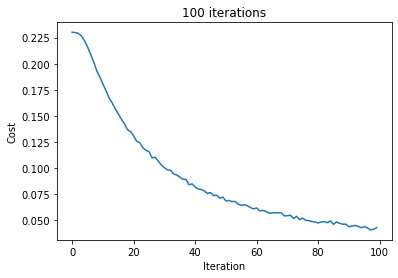

In [45]:
cls.fit(X_train, Y_train_e)

Cost after iteration 0: 0.043556
Cost after iteration 10: 0.037324
Cost after iteration 20: 0.034492
Cost after iteration 30: 0.032458
Cost after iteration 40: 0.033508
Cost after iteration 50: 0.031205
Cost after iteration 60: 0.030795
Cost after iteration 70: 0.029514
Cost after iteration 80: 0.027776
Cost after iteration 90: 0.026812
Cost after iteration 100: 0.026560
Cost after iteration 110: 0.026161
Cost after iteration 120: 0.024698
Cost after iteration 130: 0.023404
Cost after iteration 140: 0.023643
Cost after iteration 150: 0.022799
Cost after iteration 160: 0.023018
Cost after iteration 170: 0.022149
Cost after iteration 180: 0.021098
Cost after iteration 190: 0.023143


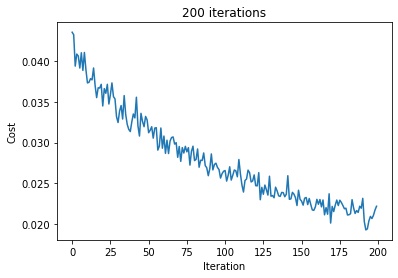

In [47]:
cls.keep_fitting(X_train, Y_train_e, 200)

In [48]:
cls.num_iter

300

In [49]:
Y_train_hat = cls.predict(X_train)
Y_test_hat = cls.predict(X_test)

print(accuracy_score(Y_train, Y_train_hat))
print(accuracy_score(Y_test, Y_test_hat))

0.9548511904761905
0.9354761904761905


In [50]:
save_to_json(cls.parameters, "nets/main_nn_300_T_"+str(T))

In [58]:
cls.T = 100

In [59]:
Y_dist = cls.predict_proba(X_train)
np.round(Y_dist[:10], 2)

array([[0.01, 0.02, 0.01, 0.01, 0.64, 0.03, 0.05, 0.05, 0.05, 0.13],
       [0.03, 0.04, 0.01, 0.04, 0.05, 0.03, 0.01, 0.56, 0.03, 0.2 ],
       [0.02, 0.02, 0.01, 0.02, 0.04, 0.01, 0.01, 0.74, 0.02, 0.12],
       [0.07, 0.01, 0.01, 0.13, 0.02, 0.56, 0.04, 0.03, 0.06, 0.07],
       [0.07, 0.03, 0.09, 0.13, 0.04, 0.19, 0.05, 0.02, 0.34, 0.03],
       [0.05, 0.02, 0.02, 0.05, 0.04, 0.03, 0.01, 0.61, 0.05, 0.13],
       [0.74, 0.01, 0.03, 0.03, 0.01, 0.11, 0.04, 0.01, 0.02, 0.01],
       [0.01, 0.67, 0.09, 0.04, 0.02, 0.01, 0.02, 0.03, 0.09, 0.02],
       [0.01, 0.57, 0.13, 0.05, 0.02, 0.02, 0.03, 0.02, 0.14, 0.02],
       [0.02, 0.12, 0.13, 0.17, 0.01, 0.04, 0.02, 0.03, 0.43, 0.04]])

## Distillation

In [60]:
cls_dist = NeuralNet(layer_dims = [784, 60, 10], learning_rate = 0.1, num_iter = 300, \
                         normalize = False, mini_batch_size=2048, T=T)

(60, 784)
(10, 60)
Cost after iteration 0: 0.230230
Cost after iteration 10: 0.209214
Cost after iteration 20: 0.183788
Cost after iteration 30: 0.170011
Cost after iteration 40: 0.161123
Cost after iteration 50: 0.155427
Cost after iteration 60: 0.151923
Cost after iteration 70: 0.150091
Cost after iteration 80: 0.147958
Cost after iteration 90: 0.146107
Cost after iteration 100: 0.145850
Cost after iteration 110: 0.145213
Cost after iteration 120: 0.144705
Cost after iteration 130: 0.143366
Cost after iteration 140: 0.144162
Cost after iteration 150: 0.143970
Cost after iteration 160: 0.143084
Cost after iteration 170: 0.143698
Cost after iteration 180: 0.143534
Cost after iteration 190: 0.142825
Cost after iteration 200: 0.143323
Cost after iteration 210: 0.142389
Cost after iteration 220: 0.143208
Cost after iteration 230: 0.142932
Cost after iteration 240: 0.142537
Cost after iteration 250: 0.141916
Cost after iteration 260: 0.141727
Cost after iteration 270: 0.142370
Cost after i

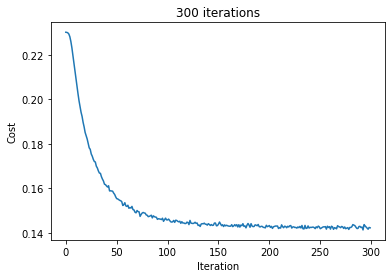

In [61]:
cls_dist.fit(X_train, Y_dist)

In [62]:
cls_dist.num_iter

300

In [63]:
Y_train_hat = cls_dist.predict(X_train)
Y_test_hat = cls_dist.predict(X_test)

print(accuracy_score(Y_train, Y_train_hat))
print(accuracy_score(Y_test, Y_test_hat))

0.9307440476190476
0.9235714285714286


In [57]:
save_to_json(cls_dist.parameters, "nets/distilled_nn_300_T_"+str(T))